# Brincando com os dados do IDEB 2023 com python - Usando os dados da Bahia

## 1.1 - instalando as bibliotecas fundamentais para a brincadeira

para iniciar essa brincadeira, precisamos primeiro instalar algumas bibliotecas importantes:
1. numpy
2. matplotlib
3. geopandas
4. osmnx
5. pandas
6. requests

In [100]:
!pip install matplotlib numpy geopandas pandas osmnx requests

Defaulting to user installation because normal site-packages is not writeable
  Attempting uninstall: kitano
    Found existing installation: kitano 0.0.7.9.1
    Uninstalling kitano-0.0.7.9.1:
      Successfully uninstalled kitano-0.0.7.9.1


In [ ]:
!pip install kitano -U

agora, é só importar

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
import geopandas as gp

from unidecode import unidecode

## 1.2 - baixando os arquivos que iremos brincar

   Os arquivos (dataset) estão no site do ibge:
```
https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/ideb/resultados
```

Vamos baixar os dos munícipios, nos anos iniciais, e brincar apenas com os da Bahia.


## 2.1 - Brincando com os dados do IDEB 2023 sobre os anos iniciais da Bahia

   Tendo baixado o arquivo, vamos ler ele pelo pandas:

In [5]:
ideb_ai = pd.read_excel('ideb_2023_municipios_anos_iniciais.xlsx',skiprows=9)
ideb_ai 

,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_APROVACAO_2005_SI_4,VL_APROVACAO_2005_SI,VL_APROVACAO_2005_1,VL_APROVACAO_2005_2,VL_APROVACAO_2005_3,VL_APROVACAO_2005_4,...,VL_OBSERVADO_2021,VL_OBSERVADO_2023,VL_PROJECAO_2007,VL_PROJECAO_2009,VL_PROJECAO_2011,VL_PROJECAO_2013,VL_PROJECAO_2015,VL_PROJECAO_2017,VL_PROJECAO_2019,VL_PROJECAO_2021
0,RO,1100015.0,Alta Floresta D'Oeste,Estadual,77.2,-,70.4,78.2,73.7,82.5,...,4.6,5.9,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.7
1,RO,1100015.0,Alta Floresta D'Oeste,Municipal,-,-,-,-,-,-,...,4.8,5.1,-,-,-,-,-,5.3,5.5,5.8
2,RO,1100015.0,Alta Floresta D'Oeste,Pública,80.9,-,73,81.5,81.1,87.9,...,4.8,5.3,3.8,4.1,4.5,4.8,5.1,5.4,5.7,5.9
3,RO,1100023.0,Ariquemes,Estadual,87.1,-,83.3,88.6,88.5,87.5,...,5.8,6.1,4.1,4.4,4.8,5.1,5.4,5.6,5.9,6.2
4,RO,1100023.0,Ariquemes,Municipal,85.7,93,79,87.3,86.1,87.4,...,4.5,5.3,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14509,que foram definidas (https://download.inep.gov...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14510,federado de 2007 até 2021;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14511,"(4) Com o fim do primeiro ciclo do Ideb, o Ine...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14512,informações ver Portaria nº 26 de 29/01/2024 (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2.2 - Pegando o formato geográfico dos municípios
   Agora, vamos pegar os dados geográficos dos municípios. Como queremos os da Bahia, vamos filtrar esse DataFrame:

In [12]:
ideb_ba = ideb_ai[ideb_ai['SG_UF']=='BA']
ideb_ba

,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_APROVACAO_2005_SI_4,VL_APROVACAO_2005_SI,VL_APROVACAO_2005_1,VL_APROVACAO_2005_2,VL_APROVACAO_2005_3,VL_APROVACAO_2005_4,...,VL_OBSERVADO_2021,VL_OBSERVADO_2023,VL_PROJECAO_2007,VL_PROJECAO_2009,VL_PROJECAO_2011,VL_PROJECAO_2013,VL_PROJECAO_2015,VL_PROJECAO_2017,VL_PROJECAO_2019,VL_PROJECAO_2021
4833,BA,2900108.0,Abaíra,Municipal,79,-,73.8,78.4,83.6,80.3,...,5.6,6,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.7
4834,BA,2900108.0,Abaíra,Pública,79,-,73.8,78.4,83.6,80.3,...,5.6,6,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.7
4835,BA,2900207.0,Abaré,Estadual,68.9,-,52.3,62.1,70.3,88.4,...,-,-,2.5,2.9,3.3,3.5,3.8,4.1,4.4,4.8
4836,BA,2900207.0,Abaré,Municipal,68.8,-,63.4,77.1,68.9,70.1,...,4.8,6.2,2.6,2.9,3.3,3.6,3.9,4.2,4.5,4.8
4837,BA,2900207.0,Abaré,Pública,68.8,-,62.8,76.2,69.1,71.6,...,4.8,6.2,2.7,3,3.4,3.7,4,4.3,4.6,4.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5853,BA,2933505.0,Wenceslau Guimarães,Municipal,43.8,-,32.9,47.7,49.9,58.9,...,4.5,4.3,2,2.7,3.3,3.5,3.8,4.1,4.4,4.7
5854,BA,2933505.0,Wenceslau Guimarães,Pública,43.8,-,32.9,47.7,49.9,58.9,...,4.5,4.3,2,2.7,3.3,3.5,3.8,4.1,4.4,4.7
5855,BA,2933604.0,Xique-Xique,Estadual,87.2,-,90.9,83.5,84.9,91.9,...,-,-,3.9,4.2,4.6,4.9,5.2,5.5,5.8,6
5856,BA,2933604.0,Xique-Xique,Municipal,65.7,-,63.1,60,72.5,72.6,...,4.7,4.6,2.5,2.9,3.3,3.5,3.8,4.1,4.4,4.8


Vamos agora, pegar os dados apenas da rede **Pública**

In [38]:
ideb_ba_pub = ideb_ba[ideb_ba['REDE']=='Pública']
list_cities_ba = list(ideb_ba_pub['NO_MUNICIPIO'])
list_cities_ba

['Abaíra',
 'Abaré',
 'Acajutiba',
 'Adustina',
 'Água Fria',
 'Érico Cardoso',
 'Aiquara',
 'Alagoinhas',
 'Alcobaça',
 'Almadina',
 'Amargosa',
 'Amélia Rodrigues',
 'América Dourada',
 'Anagé',
 'Andaraí',
 'Andorinha',
 'Angical',
 'Anguera',
 'Antas',
 'Antônio Cardoso',
 'Antônio Gonçalves',
 'Aporá',
 'Apuarema',
 'Aracatu',
 'Araçás',
 'Araci',
 'Aramari',
 'Arataca',
 'Aratuípe',
 'Aurelino Leal',
 'Baianópolis',
 'Baixa Grande',
 'Banzaê',
 'Barra',
 'Barra da Estiva',
 'Barra do Choça',
 'Barra do Mendes',
 'Barra do Rocha',
 'Barreiras',
 'Barro Alto',
 'Barrocas',
 'Barro Preto',
 'Belmonte',
 'Belo Campo',
 'Biritinga',
 'Boa Nova',
 'Boa Vista do Tupim',
 'Bom Jesus da Lapa',
 'Bom Jesus da Serra',
 'Boninal',
 'Bonito',
 'Boquira',
 'Botuporã',
 'Brejões',
 'Brejolândia',
 'Brotas de Macaúbas',
 'Brumado',
 'Buerarema',
 'Buritirama',
 'Caatiba',
 'Cabaceiras do Paraguaçu',
 'Cachoeira',
 'Caculé',
 'Caém',
 'Caetanos',
 'Caetité',
 'Cafarnaum',
 'Cairu',
 'Caldeirão Gr

Agora filtrado, vamos pegar os seus poligonos, usando o osmnx:

In [40]:

cities_ba = (list_cities_ba)
cities_ba

['Abaíra',
 'Abaré',
 'Acajutiba',
 'Adustina',
 'Água Fria',
 'Érico Cardoso',
 'Aiquara',
 'Alagoinhas',
 'Alcobaça',
 'Almadina',
 'Amargosa',
 'Amélia Rodrigues',
 'América Dourada',
 'Anagé',
 'Andaraí',
 'Andorinha',
 'Angical',
 'Anguera',
 'Antas',
 'Antônio Cardoso',
 'Antônio Gonçalves',
 'Aporá',
 'Apuarema',
 'Aracatu',
 'Araçás',
 'Araci',
 'Aramari',
 'Arataca',
 'Aratuípe',
 'Aurelino Leal',
 'Baianópolis',
 'Baixa Grande',
 'Banzaê',
 'Barra',
 'Barra da Estiva',
 'Barra do Choça',
 'Barra do Mendes',
 'Barra do Rocha',
 'Barreiras',
 'Barro Alto',
 'Barrocas',
 'Barro Preto',
 'Belmonte',
 'Belo Campo',
 'Biritinga',
 'Boa Nova',
 'Boa Vista do Tupim',
 'Bom Jesus da Lapa',
 'Bom Jesus da Serra',
 'Boninal',
 'Bonito',
 'Boquira',
 'Botuporã',
 'Brejões',
 'Brejolândia',
 'Brotas de Macaúbas',
 'Brumado',
 'Buerarema',
 'Buritirama',
 'Caatiba',
 'Cabaceiras do Paraguaçu',
 'Cachoeira',
 'Caculé',
 'Caém',
 'Caetanos',
 'Caetité',
 'Cafarnaum',
 'Cairu',
 'Caldeirão Gr

In [41]:
data_ba_cities = []
for city in cities_ba:
    city_info = {'city':city,'state':'Bahia'}
    if not city =='Santa Terezinha':
        data_ba_cities.append(city_info)



In [42]:
gdf_ba_cities = ox.geocode_to_gdf(data_ba_cities)

In [43]:
#salvando em um fileJson
gdf_ba_cities.to_file('gdf_ba_ideb.json',driver='GeoJSON')


Agora, vamos visualizar esses dados:

In [45]:
gdf_ba_cities

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-41.91833 -13.24930, -41.91413 -13.2...",-13.167911,-13.428126,-41.590354,-41.918335,13429422,relation,362174,-13.250270,-41.663991,boundary,administrative,16,0.471351,municipality,Abaíra,"Abaíra, Região Geográfica Imediata de Brumado,..."
1,"POLYGON ((-39.49158 -8.83586, -39.48501 -8.875...",-8.546362,-9.156894,-39.064570,-39.491581,13212752,relation,362190,-8.723991,-39.113969,boundary,administrative,16,0.471351,municipality,Abaré,"Abaré, Região Geográfica Imediata de Paulo Afo..."
2,"POLYGON ((-38.08190 -11.61039, -38.05400 -11.6...",-11.583133,-11.768896,-37.911759,-38.081901,12842128,relation,362207,-11.660966,-38.018638,boundary,administrative,16,0.375977,municipality,Acajutiba,"Acajutiba, Região Geográfica Imediata de Alago..."
3,"POLYGON ((-38.14885 -10.45743, -38.13000 -10.5...",-10.433000,-10.720257,-37.902595,-38.148850,13068234,relation,362946,-10.535887,-38.114479,boundary,administrative,16,0.470074,municipality,Adustina,"Adustina, Região Geográfica Imediata de Cícero..."
4,"POLYGON ((-38.86873 -11.81596, -38.85670 -11.8...",-11.690124,-11.954011,-38.542064,-38.868731,12904547,relation,362256,-11.878469,-38.766371,boundary,administrative,16,0.470014,municipality,Água Fria,"Água Fria, Região Geográfica Imediata de Feira..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,"POLYGON ((-41.17180 -14.85529, -41.17179 -14.8...",-14.670922,-15.478359,-40.525519,-41.171803,13548914,relation,362423,-14.856749,-40.841480,boundary,administrative,16,0.515783,municipality,Vitória da Conquista,"Vitória da Conquista, Região Geográfica Imedia..."
412,"POLYGON ((-41.27524 -12.15200, -41.27520 -12.1...",-12.113509,-12.382509,-40.983500,-41.275243,13391790,relation,362425,-12.281859,-41.168673,boundary,administrative,16,0.436307,municipality,Wagner,"Wagner, Região Geográfica Imediata de Itaberab..."
413,"POLYGON ((-44.17118 -11.65485, -44.17116 -11.6...",-11.348826,-12.243164,-43.658858,-44.171177,13328779,relation,362412,-12.120899,-43.890569,boundary,administrative,16,0.470671,municipality,Wanderley,"Wanderley, Região Geográfica Imediata de Barre..."
414,"POLYGON ((-39.81358 -13.56357, -39.80697 -13.5...",-13.502920,-13.735555,-39.391664,-39.813583,13633136,relation,362411,-13.686636,-39.479122,boundary,administrative,16,0.471849,municipality,Wenceslau Guimarães,"Wenceslau Guimarães, Região Geográfica Imediat..."


Agora, vamos ver os dados que podemos usar como base para plotagens:

In [47]:
list(ideb_ba_pub.columns)

['SG_UF',
 'CO_MUNICIPIO',
 'NO_MUNICIPIO',
 'REDE',
 'VL_APROVACAO_2005_SI_4',
 'VL_APROVACAO_2005_SI',
 'VL_APROVACAO_2005_1',
 'VL_APROVACAO_2005_2',
 'VL_APROVACAO_2005_3',
 'VL_APROVACAO_2005_4',
 'VL_INDICADOR_REND_2005',
 'VL_APROVACAO_2007_SI_4',
 'VL_APROVACAO_2007_SI',
 'VL_APROVACAO_2007_1',
 'VL_APROVACAO_2007_2',
 'VL_APROVACAO_2007_3',
 'VL_APROVACAO_2007_4',
 'VL_INDICADOR_REND_2007',
 'VL_APROVACAO_2009_SI_4',
 'VL_APROVACAO_2009_SI',
 'VL_APROVACAO_2009_1',
 'VL_APROVACAO_2009_2',
 'VL_APROVACAO_2009_3',
 'VL_APROVACAO_2009_4',
 'VL_INDICADOR_REND_2009',
 'VL_APROVACAO_2011_SI_4',
 'VL_APROVACAO_2011_SI',
 'VL_APROVACAO_2011_1',
 'VL_APROVACAO_2011_2',
 'VL_APROVACAO_2011_3',
 'VL_APROVACAO_2011_4',
 'VL_INDICADOR_REND_2011',
 'VL_APROVACAO_2013_SI_4',
 'VL_APROVACAO_2013_SI',
 'VL_APROVACAO_2013_1',
 'VL_APROVACAO_2013_2',
 'VL_APROVACAO_2013_3',
 'VL_APROVACAO_2013_4',
 'VL_INDICADOR_REND_2013',
 'VL_APROVACAO_2015_SI_4',
 'VL_APROVACAO_2015_SI',
 'VL_APROVACAO_2015_

Vamos pegar os dados de **VL_NOTA_MATEMATICA_2023** e agregar no gdf das cidades da bahia, para fazer a plotagem.
Como a cidade de *Santa Terezinha* deu erro, devemos tirar ela do balaio.

In [54]:
ideb_ba_pub_filter = ideb_ba_pub[ideb_ba_pub['NO_MUNICIPIO']!='Santa Terezinha']
ideb_ba_pub_filter

,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_APROVACAO_2005_SI_4,VL_APROVACAO_2005_SI,VL_APROVACAO_2005_1,VL_APROVACAO_2005_2,VL_APROVACAO_2005_3,VL_APROVACAO_2005_4,...,VL_OBSERVADO_2021,VL_OBSERVADO_2023,VL_PROJECAO_2007,VL_PROJECAO_2009,VL_PROJECAO_2011,VL_PROJECAO_2013,VL_PROJECAO_2015,VL_PROJECAO_2017,VL_PROJECAO_2019,VL_PROJECAO_2021
4834,BA,2900108.0,Abaíra,Pública,79,-,73.8,78.4,83.6,80.3,...,5.6,6,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.7
4837,BA,2900207.0,Abaré,Pública,68.8,-,62.8,76.2,69.1,71.6,...,4.8,6.2,2.7,3,3.4,3.7,4,4.3,4.6,4.9
4839,BA,2900306.0,Acajutiba,Pública,53.5,-,50.5,51.9,58.6,54.4,...,4.6,4.5,2.2,2.7,3.2,3.5,3.8,4.1,4.4,4.7
4841,BA,2900355.0,Adustina,Pública,69.1,-,62.4,71.5,69.8,73.9,...,6.1,6,3.4,3.8,4.2,4.5,4.8,5.1,5.4,5.6
4843,BA,2900405.0,Água Fria,Pública,49.7,-,33.1,53.5,61.5,58.3,...,4.7,4.1,2.1,2.7,3.2,3.5,3.8,4.1,4.4,4.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,BA,2933307.0,Vitória da Conquista,Pública,69.1,88.3,62.4,64.9,71.8,75.5,...,5.6,5.6,3.3,3.6,4,4.3,4.6,4.9,5.2,5.5
5849,BA,2933406.0,Wagner,Pública,72.8,-,64.8,74.4,78.2,76.9,...,5.6,5.8,3.1,3.5,3.9,4.2,4.5,4.8,5.1,5.4
5852,BA,2933455.0,Wanderley,Pública,66.5,-,53.6,72.6,78.6,69.6,...,5.4,5.7,2.3,2.6,3,3.2,3.5,3.8,4.1,4.4
5854,BA,2933505.0,Wenceslau Guimarães,Pública,43.8,-,32.9,47.7,49.9,58.9,...,4.5,4.3,2,2.7,3.3,3.5,3.8,4.1,4.4,4.7


In [71]:
notas_math_2023 = np.array(list(ideb_ba_pub_filter['VL_NOTA_MATEMATICA_2023']),dtype=object)
notas_math_2023[notas_math_2023== 'ND'] = 1 # Não possui informação sobre
notas_math_2023.astype(float)
notas_math_2023

array([221.92, 233.68, 190.43, 237.1, 196.83, 203.01, 199.68, 208.41,
       210.72, 179.06, 207.1, 195.47, 191.26, 218.28, 235.5, 187.64,
       201.8, 243.73, 214.87, 176.82, 203.02, 172.25, 179.93, 204.64,
       191.53, 187.66, 204.79, 163.72, 207.65, 179.38, 207.51, 194.85,
       256.79, 187.62, 209.38, 188.29, 236.31, 183.69, 205.48, 215.8,
       205.54, 187.4, 190.15, 190.45, 180.8, 221.51, 201.46, 191.87,
       193.33, 210.27, 205.75, 205.14, 244, 192.01, 196.47, 193.26,
       229.33, 173.14, 188.37, 212.92, 171.4, 177.23, 229.94, 203.12,
       213.4, 213.74, 195.85, 204.76, 174.21, 177.12, 198.42, 182.54,
       189.43, 204.71, 197.12, 202.41, 182.2, 197.55, 195.98, 203.22,
       184.94, 188.92, 192.16, 192.03, 197.65, 196.62, 211.01, 175.45,
       179.99, 183.35, 208.08, 179.2, 204.58, 201.31, 181.82, 208.92,
       204.24, 185.11, 195.77, 214.1, 188.44, 1, 187.5, 195.11, 179.89,
       225.72, 208.24, 194.59, 208.42, 214.94, 203.27, 204.76, 194.75,
       201.37, 210.

In [72]:
gdf_ba_cities['notas_math_2023'] = notas_math_2023
gdf_ba_cities

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name,notas_math_2023
0,"POLYGON ((-41.91833 -13.24930, -41.91413 -13.2...",-13.167911,-13.428126,-41.590354,-41.918335,13429422,relation,362174,-13.250270,-41.663991,boundary,administrative,16,0.471351,municipality,Abaíra,"Abaíra, Região Geográfica Imediata de Brumado,...",221.92
1,"POLYGON ((-39.49158 -8.83586, -39.48501 -8.875...",-8.546362,-9.156894,-39.064570,-39.491581,13212752,relation,362190,-8.723991,-39.113969,boundary,administrative,16,0.471351,municipality,Abaré,"Abaré, Região Geográfica Imediata de Paulo Afo...",233.68
2,"POLYGON ((-38.08190 -11.61039, -38.05400 -11.6...",-11.583133,-11.768896,-37.911759,-38.081901,12842128,relation,362207,-11.660966,-38.018638,boundary,administrative,16,0.375977,municipality,Acajutiba,"Acajutiba, Região Geográfica Imediata de Alago...",190.43
3,"POLYGON ((-38.14885 -10.45743, -38.13000 -10.5...",-10.433000,-10.720257,-37.902595,-38.148850,13068234,relation,362946,-10.535887,-38.114479,boundary,administrative,16,0.470074,municipality,Adustina,"Adustina, Região Geográfica Imediata de Cícero...",237.1
4,"POLYGON ((-38.86873 -11.81596, -38.85670 -11.8...",-11.690124,-11.954011,-38.542064,-38.868731,12904547,relation,362256,-11.878469,-38.766371,boundary,administrative,16,0.470014,municipality,Água Fria,"Água Fria, Região Geográfica Imediata de Feira...",196.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,"POLYGON ((-41.17180 -14.85529, -41.17179 -14.8...",-14.670922,-15.478359,-40.525519,-41.171803,13548914,relation,362423,-14.856749,-40.841480,boundary,administrative,16,0.515783,municipality,Vitória da Conquista,"Vitória da Conquista, Região Geográfica Imedia...",220.15
412,"POLYGON ((-41.27524 -12.15200, -41.27520 -12.1...",-12.113509,-12.382509,-40.983500,-41.275243,13391790,relation,362425,-12.281859,-41.168673,boundary,administrative,16,0.436307,municipality,Wagner,"Wagner, Região Geográfica Imediata de Itaberab...",216.83
413,"POLYGON ((-44.17118 -11.65485, -44.17116 -11.6...",-11.348826,-12.243164,-43.658858,-44.171177,13328779,relation,362412,-12.120899,-43.890569,boundary,administrative,16,0.470671,municipality,Wanderley,"Wanderley, Região Geográfica Imediata de Barre...",218.16
414,"POLYGON ((-39.81358 -13.56357, -39.80697 -13.5...",-13.502920,-13.735555,-39.391664,-39.813583,13633136,relation,362411,-13.686636,-39.479122,boundary,administrative,16,0.471849,municipality,Wenceslau Guimarães,"Wenceslau Guimarães, Região Geográfica Imediat...",187.16


Plotando:

/tmp/ipykernel_48477/2274198814.py:26: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


<Figure size 640x480 with 0 Axes>

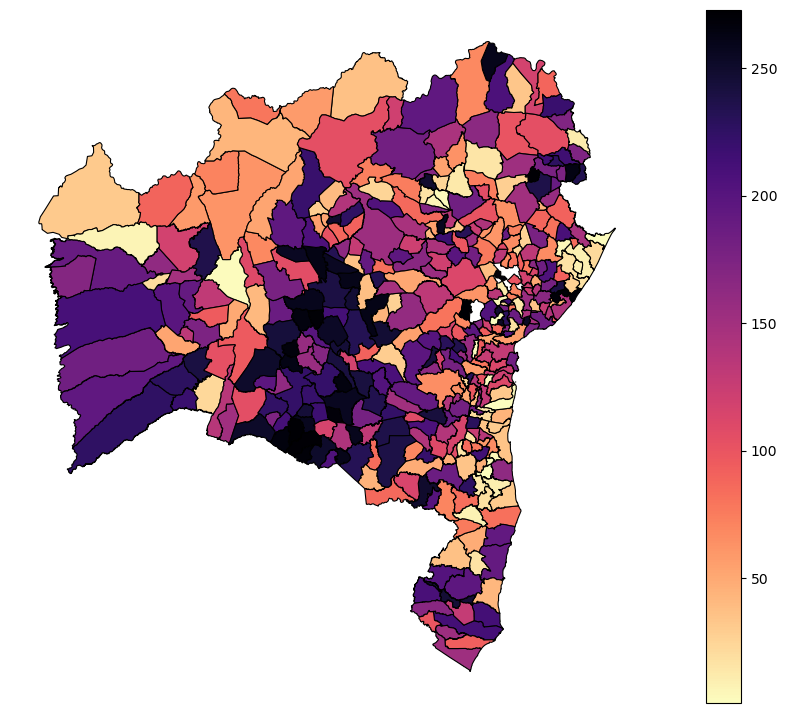

In [85]:
plt.figure()
fig, ax = plt.subplots(1, figsize=(16, 9))

plot = gdf_ba_cities.plot(edgecolor='black',facecolor=None,
                          column='notas_math_2023',linewidth=0.8,
                          ax=ax,cmap='magma_r')


# for idx, row in gdf_ba_cities.iterrows():
#     centroid = row.geometry.centroid
#     ax.annotate(text=f"{row['name']}: {row['notas_math_2023']}", 
#                 xy=(centroid.x, centroid.y),
#                 xytext=(3, 3),
#                 textcoords="offset points",
#                 fontsize=4,
#                 color='white',
#                 ha='center', va='center',
#                 bbox=dict(facecolor='none', edgecolor='none', alpha=0.7))


nota_max, nota_min = (notas_math_2023).max(), (notas_math_2023).min()

sm = plt.cm.ScalarMappable(cmap='magma_r', norm=plt.Normalize(vmin=nota_min, vmax=nota_max))
sm._A = []

cbar = fig.colorbar(sm)
plt.axis('off')


plt.savefig('plot_ba_math_2023.png',dpi=800)

plt.show()

## 3.1 - Fazendo agora para o Ceará
   Como já temos uma base de código, vamos agora, automatizar o nosso trabalho:

In [106]:
from kitano import puts

def plot_math_2023(state_name,state_code,rede,file_data_ibge):
    puts(f"reading DataFrame from '{file_data_ibge}'...")
    df = pd.read_excel(file_data_ibge,skiprows=9)
    df_state = df[df['SG_UF']==state_code]
    df_state_rede = df_state[df_state['REDE']==rede]
    puts(f"'{file_data_ibge}' is readed!")
    
    list_cities_df = list(df_state_rede['NO_MUNICIPIO'])
    
    puts(f"getting gdf cities from '{state_name}-{state_code}'...")
    dict_cities_to_gdf = [{'city':city,'state':state_name} for city in list_cities_df]
    gdf_df_cities = ox.geocode_to_gdf(dict_cities_to_gdf)
    file_name_gdf = f'{unidecode(state_name.lower())}_gdf_cities.json'
    gdf_df_cities.to_file(file_name_gdf,driver='GeoJSON')
    puts(f"gdf cities from '{state_name}-{state_code}'  saved in file '{file_name_gdf}'!")
    
    puts(f"getting math notas from df...")
    notas_math_2023 = np.array(list(df_state_rede['VL_NOTA_MATEMATICA_2023']),dtype=object)
    notas_math_2023[notas_math_2023== 'ND'] = 1 # Não possui informação sobre
    notas_math_2023.astype(float)
    nota_max, nota_min = (notas_math_2023).max(), (notas_math_2023).min()
    gdf_df_cities['notas_math_2023'] = notas_math_2023
    puts(f"math notas getted!")

    puts(f"making plot...")
    plot = gdf_df_cities.plot(edgecolor='black',facecolor=None,
                          column='notas_math_2023',linewidth=0.8,
                          ax=ax,cmap='magma_r')
    sm = plt.cm.ScalarMappable(cmap='magma_r', norm=plt.Normalize(vmin=nota_min, vmax=nota_max))
    sm._A = []
    cbar = fig.colorbar(sm)
    plt.axis('off')
    puts(f"plot success!")
    

[31/08/2024 23:05:43]: reading DataFrame from 'ideb_2023_municipios_anos_iniciais.xlsx'... 
[31/08/2024 23:07:47]: 'ideb_2023_municipios_anos_iniciais.xlsx' is readed! 
[31/08/2024 23:07:47]: getting gdf cities from 'Ceará-CE'... 
[31/08/2024 23:07:59]: gdf cities from 'Ceará-CE'  saved in file 'ceara_gdf_cities.json'! 
[31/08/2024 23:07:59]: getting math notas from df... 
[31/08/2024 23:07:59]: math notas getted! 
[31/08/2024 23:07:59]: making plot... 


/tmp/ipykernel_48477/3865081497.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


[31/08/2024 23:08:00]: plot success! 


<Figure size 640x480 with 0 Axes>

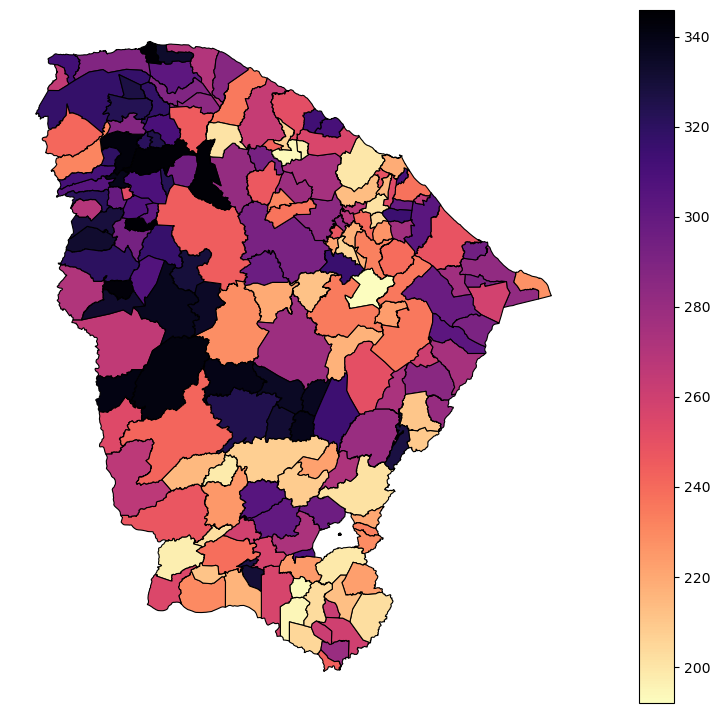

In [107]:
plt.figure()
fig, ax = plt.subplots(1, figsize=(16, 9))


plot_math_2023('Ceará','CE','Pública','ideb_2023_municipios_anos_iniciais.xlsx')

[31/08/2024 23:49:16]: reading DataFrame from 'ideb_2023_municipios_anos_iniciais.xlsx'... 
[31/08/2024 23:51:22]: 'ideb_2023_municipios_anos_iniciais.xlsx' is readed! 
[31/08/2024 23:51:23]: getting gdf cities from 'Pernambuco-PE'... 
[31/08/2024 23:58:26]: gdf cities from 'Pernambuco-PE'  saved in file 'pernambuco_gdf_cities.json'! 
[31/08/2024 23:58:26]: getting math notas from df... 
[31/08/2024 23:58:26]: math notas getted! 
[31/08/2024 23:58:26]: making plot... 


/tmp/ipykernel_48477/3865081497.py:33: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(sm)


[31/08/2024 23:58:27]: plot success! 


<Figure size 640x480 with 0 Axes>

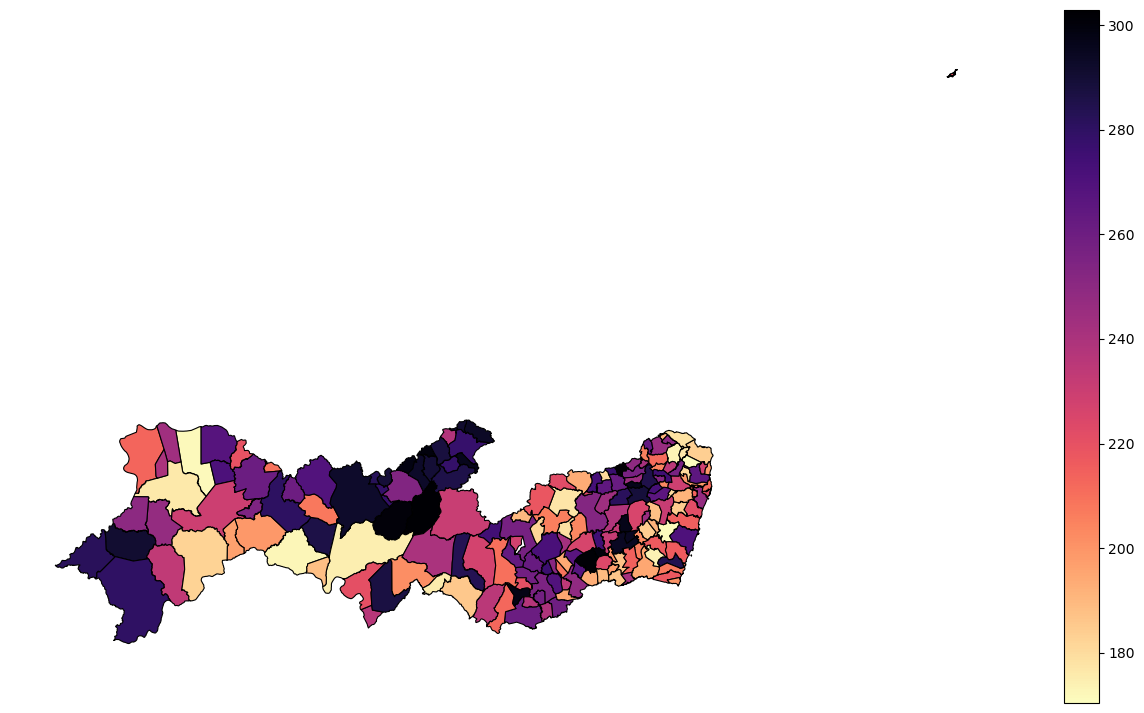

In [108]:
plt.figure()
fig, ax = plt.subplots(1, figsize=(16, 9))


plot_math_2023('Pernambuco','PE','Pública','ideb_2023_municipios_anos_iniciais.xlsx')